In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
# Loading the datasets
train_data = pd.read_csv('/content/testData.csv')
test_data = pd.read_csv('/content/trainData.csv')


In [3]:
train_data.head()

,id,member_id,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,NaN,NaN,8000,7.07,247.28,A,10+ years,MORTGAGE,78000.0,Fully Paid,...,0.0,0.0,0.0,6844.48,0.0,Individual,0.0,0.0,200412.0,16800.0
1,NaN,NaN,20000,7.21,619.47,A,3 years,RENT,78000.0,Current,...,0.0,0.0,0.0,619.47,0.0,Individual,0.0,0.0,39187.0,42100.0
2,NaN,NaN,20000,12.74,452.41,C,5 years,MORTGAGE,97000.0,Current,...,0.0,0.0,0.0,452.41,0.0,Individual,0.0,0.0,279688.0,6500.0
3,NaN,NaN,20000,8.81,634.23,A,10+ years,MORTGAGE,115000.0,Fully Paid,...,0.0,0.0,0.0,20015.91,0.0,Individual,0.0,0.0,172493.0,40200.0
4,NaN,NaN,20000,15.31,479.06,C,10+ years,OWN,75000.0,Fully Paid,...,0.0,0.0,0.0,478.99,0.0,Individual,0.0,NaN,NaN,NaN


In [4]:
 test_data.head()

,id,member_id,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,NaN,NaN,18600,10.99,608.86,B,6 years,RENT,80000.0,Fully Paid,...,0.0,0.0,0.0,15705.09,0.0,Individual,0.0,0.0,170238.0,20700.0
1,NaN,NaN,2000,17.97,72.28,D,4 years,MORTGAGE,55400.0,Current,...,0.0,0.0,0.0,72.28,0.0,Joint App,0.0,74.0,351452.0,10800.0
2,NaN,NaN,12000,12.29,400.24,C,10+ years,OWN,60000.0,Fully Paid,...,0.0,0.0,0.0,11281.15,0.0,Individual,0.0,0.0,18207.0,20600.0
3,NaN,NaN,16000,19.42,589.90,D,7 years,RENT,64000.0,Current,...,0.0,0.0,0.0,589.90,0.0,Individual,0.0,0.0,12293.0,7800.0
4,NaN,NaN,22525,16.02,548.01,C,10+ years,MORTGAGE,94080.0,Fully Paid,...,0.0,0.0,0.0,21483.11,0.0,Individual,0.0,250.0,571244.0,53800.0


Displaying the basic information present in Dataset


In [5]:


print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226067 entries, 0 to 226066
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          0 non-null       float64
 1   member_id                   0 non-null       float64
 2   loan_amnt                   226067 non-null  int64  
 3   int_rate                    226067 non-null  float64
 4   installment                 226067 non-null  float64
 5   grade                       226067 non-null  object 
 6   emp_length                  211268 non-null  object 
 7   home_ownership              226067 non-null  object 
 8   annual_inc                  226066 non-null  float64
 9   loan_status                 226067 non-null  object 
 10  dti                         225893 non-null  float64
 11  delinq_2yrs                 226062 non-null  float64
 12  inq_last_6mths              226061 non-null  float64
 13  mths_since_las

In [6]:
print(train_data.describe())

        id  member_id      loan_amnt       int_rate    installment  \
count  0.0        0.0  226067.000000  226067.000000  226067.000000   
mean   NaN        NaN   15058.101470      13.097154     446.098229   
std    NaN        NaN    9178.970282       4.835467     266.724762   
min    NaN        NaN     500.000000       5.310000      15.760000   
25%    NaN        NaN    8000.000000       9.490000     251.980000   
50%    NaN        NaN   12925.000000      12.620000     378.200000   
75%    NaN        NaN   20000.000000      15.990000     594.475000   
max    NaN        NaN   40000.000000      30.990000    1714.540000   

         annual_inc            dti    delinq_2yrs  inq_last_6mths  \
count  2.260660e+05  225893.000000  226062.000000   226061.000000   
mean   7.795256e+04      18.845896       0.306942        0.574836   
std    8.248038e+04      14.768481       0.878300        0.882059   
min    0.000000e+00       0.000000       0.000000        0.000000   
25%    4.600000e+04     

In [7]:
train_data.shape


(226067, 33)

**Data Pre Processing** (Performing EDA)

In [8]:
# Check for missing values
print(train_data.isnull().sum())

id                            226067
member_id                     226067
loan_amnt                          0
int_rate                           0
installment                        0
grade                              0
emp_length                     14799
home_ownership                     0
annual_inc                         1
loan_status                        0
dti                              174
delinq_2yrs                        5
inq_last_6mths                     6
mths_since_last_delinq        115999
open_acc                           5
pub_rec                            5
revol_bal                          0
revol_util                       159
total_acc                          5
total_pymnt                        0
total_pymnt_inv                    0
total_rec_prncp                    0
total_rec_int                      0
total_rec_late_fee                 0
recoveries                         0
collection_recovery_fee            0
last_pymnt_amnt                    0
c

In [9]:
# Identify numerical columns
numerical_columns = train_data.select_dtypes(include=np.number).columns

# Fill missing values in numerical columns with the mean
train_data[numerical_columns] = train_data[numerical_columns].fillna(train_data[numerical_columns].mean())

# Display the first few rows of the numerical columns
print(train_data[numerical_columns].head())

   id  member_id  loan_amnt  int_rate  installment  annual_inc    dti  \
0 NaN        NaN       8000      7.07       247.28     78000.0  19.25   
1 NaN        NaN      20000      7.21       619.47     78000.0  23.06   
2 NaN        NaN      20000     12.74       452.41     97000.0   5.52   
3 NaN        NaN      20000      8.81       634.23    115000.0  16.84   
4 NaN        NaN      20000     15.31       479.06     75000.0   7.95   

   delinq_2yrs  inq_last_6mths  mths_since_last_delinq  ...  total_rec_int  \
0          0.0             0.0               32.000000  ...         325.02   
1          0.0             0.0               34.571274  ...         659.62   
2          1.0             0.0               15.000000  ...        4217.64   
3          0.0             2.0               34.571274  ...           6.12   
4          0.0             3.0               34.571274  ...        8743.53   

   total_rec_late_fee  recoveries  collection_recovery_fee  last_pymnt_amnt  \
0            

In [10]:

# Identify categorical columns
cat_cols = train_data.select_dtypes(exclude=np.number).columns

# Fill missing values in categorical columns with the mode (most frequent value)
train_data[cat_cols] = train_data[cat_cols].fillna(train_data[cat_cols].mode().iloc[0])

# Display the first few rows of the categorical columns
print(train_data[cat_cols].head())


  grade emp_length home_ownership loan_status application_type
0     A  10+ years       MORTGAGE  Fully Paid       Individual
1     A    3 years           RENT     Current       Individual
2     C    5 years       MORTGAGE     Current       Individual
3     A  10+ years       MORTGAGE  Fully Paid       Individual
4     C  10+ years            OWN  Fully Paid       Individual


In [11]:
print(train_data.isnull().sum())

id                            226067
member_id                     226067
loan_amnt                          0
int_rate                           0
installment                        0
grade                              0
emp_length                         0
home_ownership                     0
annual_inc                         0
loan_status                        0
dti                                0
delinq_2yrs                        0
inq_last_6mths                     0
mths_since_last_delinq             0
open_acc                           0
pub_rec                            0
revol_bal                          0
revol_util                         0
total_acc                          0
total_pymnt                        0
total_pymnt_inv                    0
total_rec_prncp                    0
total_rec_int                      0
total_rec_late_fee                 0
recoveries                         0
collection_recovery_fee            0
last_pymnt_amnt                    0
c

In [12]:
test_data.isnull().sum()

id                            226067
member_id                     226067
loan_amnt                          0
int_rate                           0
installment                        0
grade                              0
emp_length                     14611
home_ownership                     0
annual_inc                         0
loan_status                        0
dti                              180
delinq_2yrs                        5
inq_last_6mths                     5
mths_since_last_delinq        115840
open_acc                           5
pub_rec                            5
revol_bal                          0
revol_util                       190
total_acc                          5
total_pymnt                        0
total_pymnt_inv                    0
total_rec_prncp                    0
total_rec_int                      0
total_rec_late_fee                 0
recoveries                         0
collection_recovery_fee            0
last_pymnt_amnt                    0
c

Imputation Using Foward fill method (Handling Missing Values)

In [13]:
# Handling missing values
test_data.fillna(method = 'ffill', inplace=True)
num_cols = test_data.select_dtypes(include=np.number).columns

# Filing missing values in numerical columns with the median value of each column.

test_data[num_cols] = test_data[num_cols].fillna(test_data[num_cols].median())
print(test_data[num_cols].head())

   id  member_id  loan_amnt  int_rate  installment  annual_inc    dti  \
0 NaN        NaN      18600     10.99       608.86     80000.0  12.92   
1 NaN        NaN       2000     17.97        72.28     55400.0  10.62   
2 NaN        NaN      12000     12.29       400.24     60000.0  17.92   
3 NaN        NaN      16000     19.42       589.90     64000.0   3.90   
4 NaN        NaN      22525     16.02       548.01     94080.0  19.08   

   delinq_2yrs  inq_last_6mths  mths_since_last_delinq  ...  total_rec_int  \
0          0.0             0.0                    31.0  ...        1355.75   
1          1.0             2.0                    21.0  ...          83.95   
2          0.0             0.0                    33.0  ...         485.96   
3          1.0             0.0                    16.0  ...        2303.08   
4          1.0             0.0                    14.0  ...        2226.12   

   total_rec_late_fee  recoveries  collection_recovery_fee  last_pymnt_amnt  \
0            

In [14]:
# Handling missing values
cat_cols = test_data.select_dtypes(exclude=np.number).columns

# Filing missing values in categorical columns with the mode value of each column.
test_data[cat_cols] = test_data[cat_cols].fillna(test_data[cat_cols].mode().iloc[0])
print(test_data[cat_cols].head())

  grade emp_length home_ownership loan_status application_type
0     B    6 years           RENT  Fully Paid       Individual
1     D    4 years       MORTGAGE     Current        Joint App
2     C  10+ years            OWN  Fully Paid       Individual
3     D    7 years           RENT     Current       Individual
4     C  10+ years       MORTGAGE  Fully Paid       Individual


In [15]:
test_data.isnull().sum()

id                            226067
member_id                     226067
loan_amnt                          0
int_rate                           0
installment                        0
grade                              0
emp_length                         0
home_ownership                     0
annual_inc                         0
loan_status                        0
dti                                0
delinq_2yrs                        0
inq_last_6mths                     0
mths_since_last_delinq             0
open_acc                           0
pub_rec                            0
revol_bal                          0
revol_util                         0
total_acc                          0
total_pymnt                        0
total_pymnt_inv                    0
total_rec_prncp                    0
total_rec_int                      0
total_rec_late_fee                 0
recoveries                         0
collection_recovery_fee            0
last_pymnt_amnt                    0
c

In [16]:

# Droping the columns that are empty or no longer needed.

columns_to_drop=['id','member_id','mths_since_last_delinq']
train_data.drop(columns_to_drop, axis=1, inplace=True)
print(train_data.head())

   loan_amnt  int_rate  installment grade emp_length home_ownership  \
0       8000      7.07       247.28     A  10+ years       MORTGAGE   
1      20000      7.21       619.47     A    3 years           RENT   
2      20000     12.74       452.41     C    5 years       MORTGAGE   
3      20000      8.81       634.23     A  10+ years       MORTGAGE   
4      20000     15.31       479.06     C  10+ years            OWN   

   annual_inc loan_status    dti  delinq_2yrs  ...  total_rec_late_fee  \
0     78000.0  Fully Paid  19.25          0.0  ...                 0.0   
1     78000.0     Current  23.06          0.0  ...                 0.0   
2     97000.0     Current   5.52          1.0  ...                 0.0   
3    115000.0  Fully Paid  16.84          0.0  ...                 0.0   
4     75000.0  Fully Paid   7.95          0.0  ...                 0.0   

   recoveries  collection_recovery_fee  last_pymnt_amnt  \
0         0.0                      0.0          6844.48   
1         

In [17]:

# Droping the columns that are empty or no longer needed.

columns_to_drop=['id','member_id','mths_since_last_delinq']
test_data.drop(columns_to_drop, axis=1, inplace=True)
print(test_data.head())

   loan_amnt  int_rate  installment grade emp_length home_ownership  \
0      18600     10.99       608.86     B    6 years           RENT   
1       2000     17.97        72.28     D    4 years       MORTGAGE   
2      12000     12.29       400.24     C  10+ years            OWN   
3      16000     19.42       589.90     D    7 years           RENT   
4      22525     16.02       548.01     C  10+ years       MORTGAGE   

   annual_inc loan_status    dti  delinq_2yrs  ...  total_rec_late_fee  \
0     80000.0  Fully Paid  12.92          0.0  ...                 0.0   
1     55400.0     Current  10.62          1.0  ...                 0.0   
2     60000.0  Fully Paid  17.92          0.0  ...                 0.0   
3     64000.0     Current   3.90          1.0  ...                 0.0   
4     94080.0  Fully Paid  19.08          1.0  ...                 0.0   

   recoveries  collection_recovery_fee  last_pymnt_amnt  \
0         0.0                      0.0         15705.09   
1         

In [18]:
# checking the columns after dropping the values
print(train_data.columns)

Index(['loan_amnt', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'loan_status', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'application_type', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')


In [19]:
# checking the columns after dropping the values
print(test_data.columns)

Index(['loan_amnt', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'loan_status', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'application_type', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')


In [20]:
# Creating a 'y' as a new variable with 1 if the loan status is 'Charged Off' and 0 otherwise
train_data['y'] = train_data['loan_status'].apply(lambda status: 1 if status == 'Charged Off' else 0)
test_data['y'] = test_data['loan_status'].apply(lambda status: 1 if status == 'Charged Off' else 0)


**Label Encoding**

In [21]:

# Initialize  the LabelEncoder
label_encoder = LabelEncoder()

# Identify categorical columns
categorical_columns = train_data.select_dtypes(include=['object']).columns

# Convert categorical columns to numerical ones in both training and testing datasets
for column in categorical_columns:
    train_data[column] = label_encoder.fit_transform(train_data[column])
    test_data[column] = label_encoder.transform(test_data[column])

# Display the first few rows of the transformed training data
print(train_data.head())
print(test_data.head())

   loan_amnt  int_rate  installment  grade  emp_length  home_ownership  \
0       8000      7.07       247.28      0           1               1   
1      20000      7.21       619.47      0           3               5   
2      20000     12.74       452.41      2           5               1   
3      20000      8.81       634.23      0           1               1   
4      20000     15.31       479.06      2           1               4   

   annual_inc  loan_status    dti  delinq_2yrs  ...  recoveries  \
0     78000.0            5  19.25          0.0  ...         0.0   
1     78000.0            1  23.06          0.0  ...         0.0   
2     97000.0            1   5.52          1.0  ...         0.0   
3    115000.0            5  16.84          0.0  ...         0.0   
4     75000.0            5   7.95          0.0  ...         0.0   

   collection_recovery_fee  last_pymnt_amnt  collections_12_mths_ex_med  \
0                      0.0          6844.48                         0.0   
1 

In [22]:

# Initialize  the LabelEncoder
label_encoder = LabelEncoder()

# Identify categorical columns
categorical_columns = test_data.select_dtypes(include=['object']).columns

# Convert categorical columns to numerical ones in both training and testing datasets
for column in categorical_columns:
    test_data[column] = label_encoder.transform(test_data[column])

# Display the first few rows of the transformed training data
print(test_data.head())

   loan_amnt  int_rate  installment  grade  emp_length  home_ownership  \
0      18600     10.99       608.86      1           6               5   
1       2000     17.97        72.28      3           4               1   
2      12000     12.29       400.24      2           1               4   
3      16000     19.42       589.90      3           7               5   
4      22525     16.02       548.01      2           1               1   

   annual_inc  loan_status    dti  delinq_2yrs  ...  recoveries  \
0     80000.0            5  12.92          0.0  ...         0.0   
1     55400.0            1  10.62          1.0  ...         0.0   
2     60000.0            5  17.92          0.0  ...         0.0   
3     64000.0            1   3.90          1.0  ...         0.0   
4     94080.0            5  19.08          1.0  ...         0.0   

   collection_recovery_fee  last_pymnt_amnt  collections_12_mths_ex_med  \
0                      0.0         15705.09                         0.0   
1 

In [23]:
# Checking the data after the label encoding

train_data.head()


,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,dti,delinq_2yrs,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,y
0,8000,7.07,247.28,0,1,1,78000.0,5,19.25,0.0,...,0.0,0.0,6844.48,0.0,0,0.0,0.000000,200412.000000,16800.000000,0
1,20000,7.21,619.47,0,3,5,78000.0,1,23.06,0.0,...,0.0,0.0,619.47,0.0,0,0.0,0.000000,39187.000000,42100.000000,0
2,20000,12.74,452.41,2,5,1,97000.0,1,5.52,1.0,...,0.0,0.0,452.41,0.0,0,0.0,0.000000,279688.000000,6500.000000,0
3,20000,8.81,634.23,0,1,1,115000.0,5,16.84,0.0,...,0.0,0.0,20015.91,0.0,0,0.0,0.000000,172493.000000,40200.000000,0
4,20000,15.31,479.06,2,1,4,75000.0,5,7.95,0.0,...,0.0,0.0,478.99,0.0,0,0.0,223.969079,141991.342823,34588.517572,0


In [24]:

# Checking the data after the label encoding
test_data.head()



,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,dti,delinq_2yrs,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,y
0,18600,10.99,608.86,1,6,5,80000.0,5,12.92,0.0,...,0.0,0.0,15705.09,0.0,0,0.0,0.0,170238.0,20700.0,0
1,2000,17.97,72.28,3,4,1,55400.0,1,10.62,1.0,...,0.0,0.0,72.28,0.0,1,0.0,74.0,351452.0,10800.0,0
2,12000,12.29,400.24,2,1,4,60000.0,5,17.92,0.0,...,0.0,0.0,11281.15,0.0,0,0.0,0.0,18207.0,20600.0,0
3,16000,19.42,589.90,3,7,5,64000.0,1,3.90,1.0,...,0.0,0.0,589.90,0.0,0,0.0,0.0,12293.0,7800.0,0
4,22525,16.02,548.01,2,1,1,94080.0,5,19.08,1.0,...,0.0,0.0,21483.11,0.0,0,0.0,250.0,571244.0,53800.0,0


In [25]:
# Removing the "loan_status" column from the training and test dataset.

train_data = train_data.drop(['loan_status'], axis=1)
test_data = test_data.drop(['loan_status'], axis=1)

**Visulization**

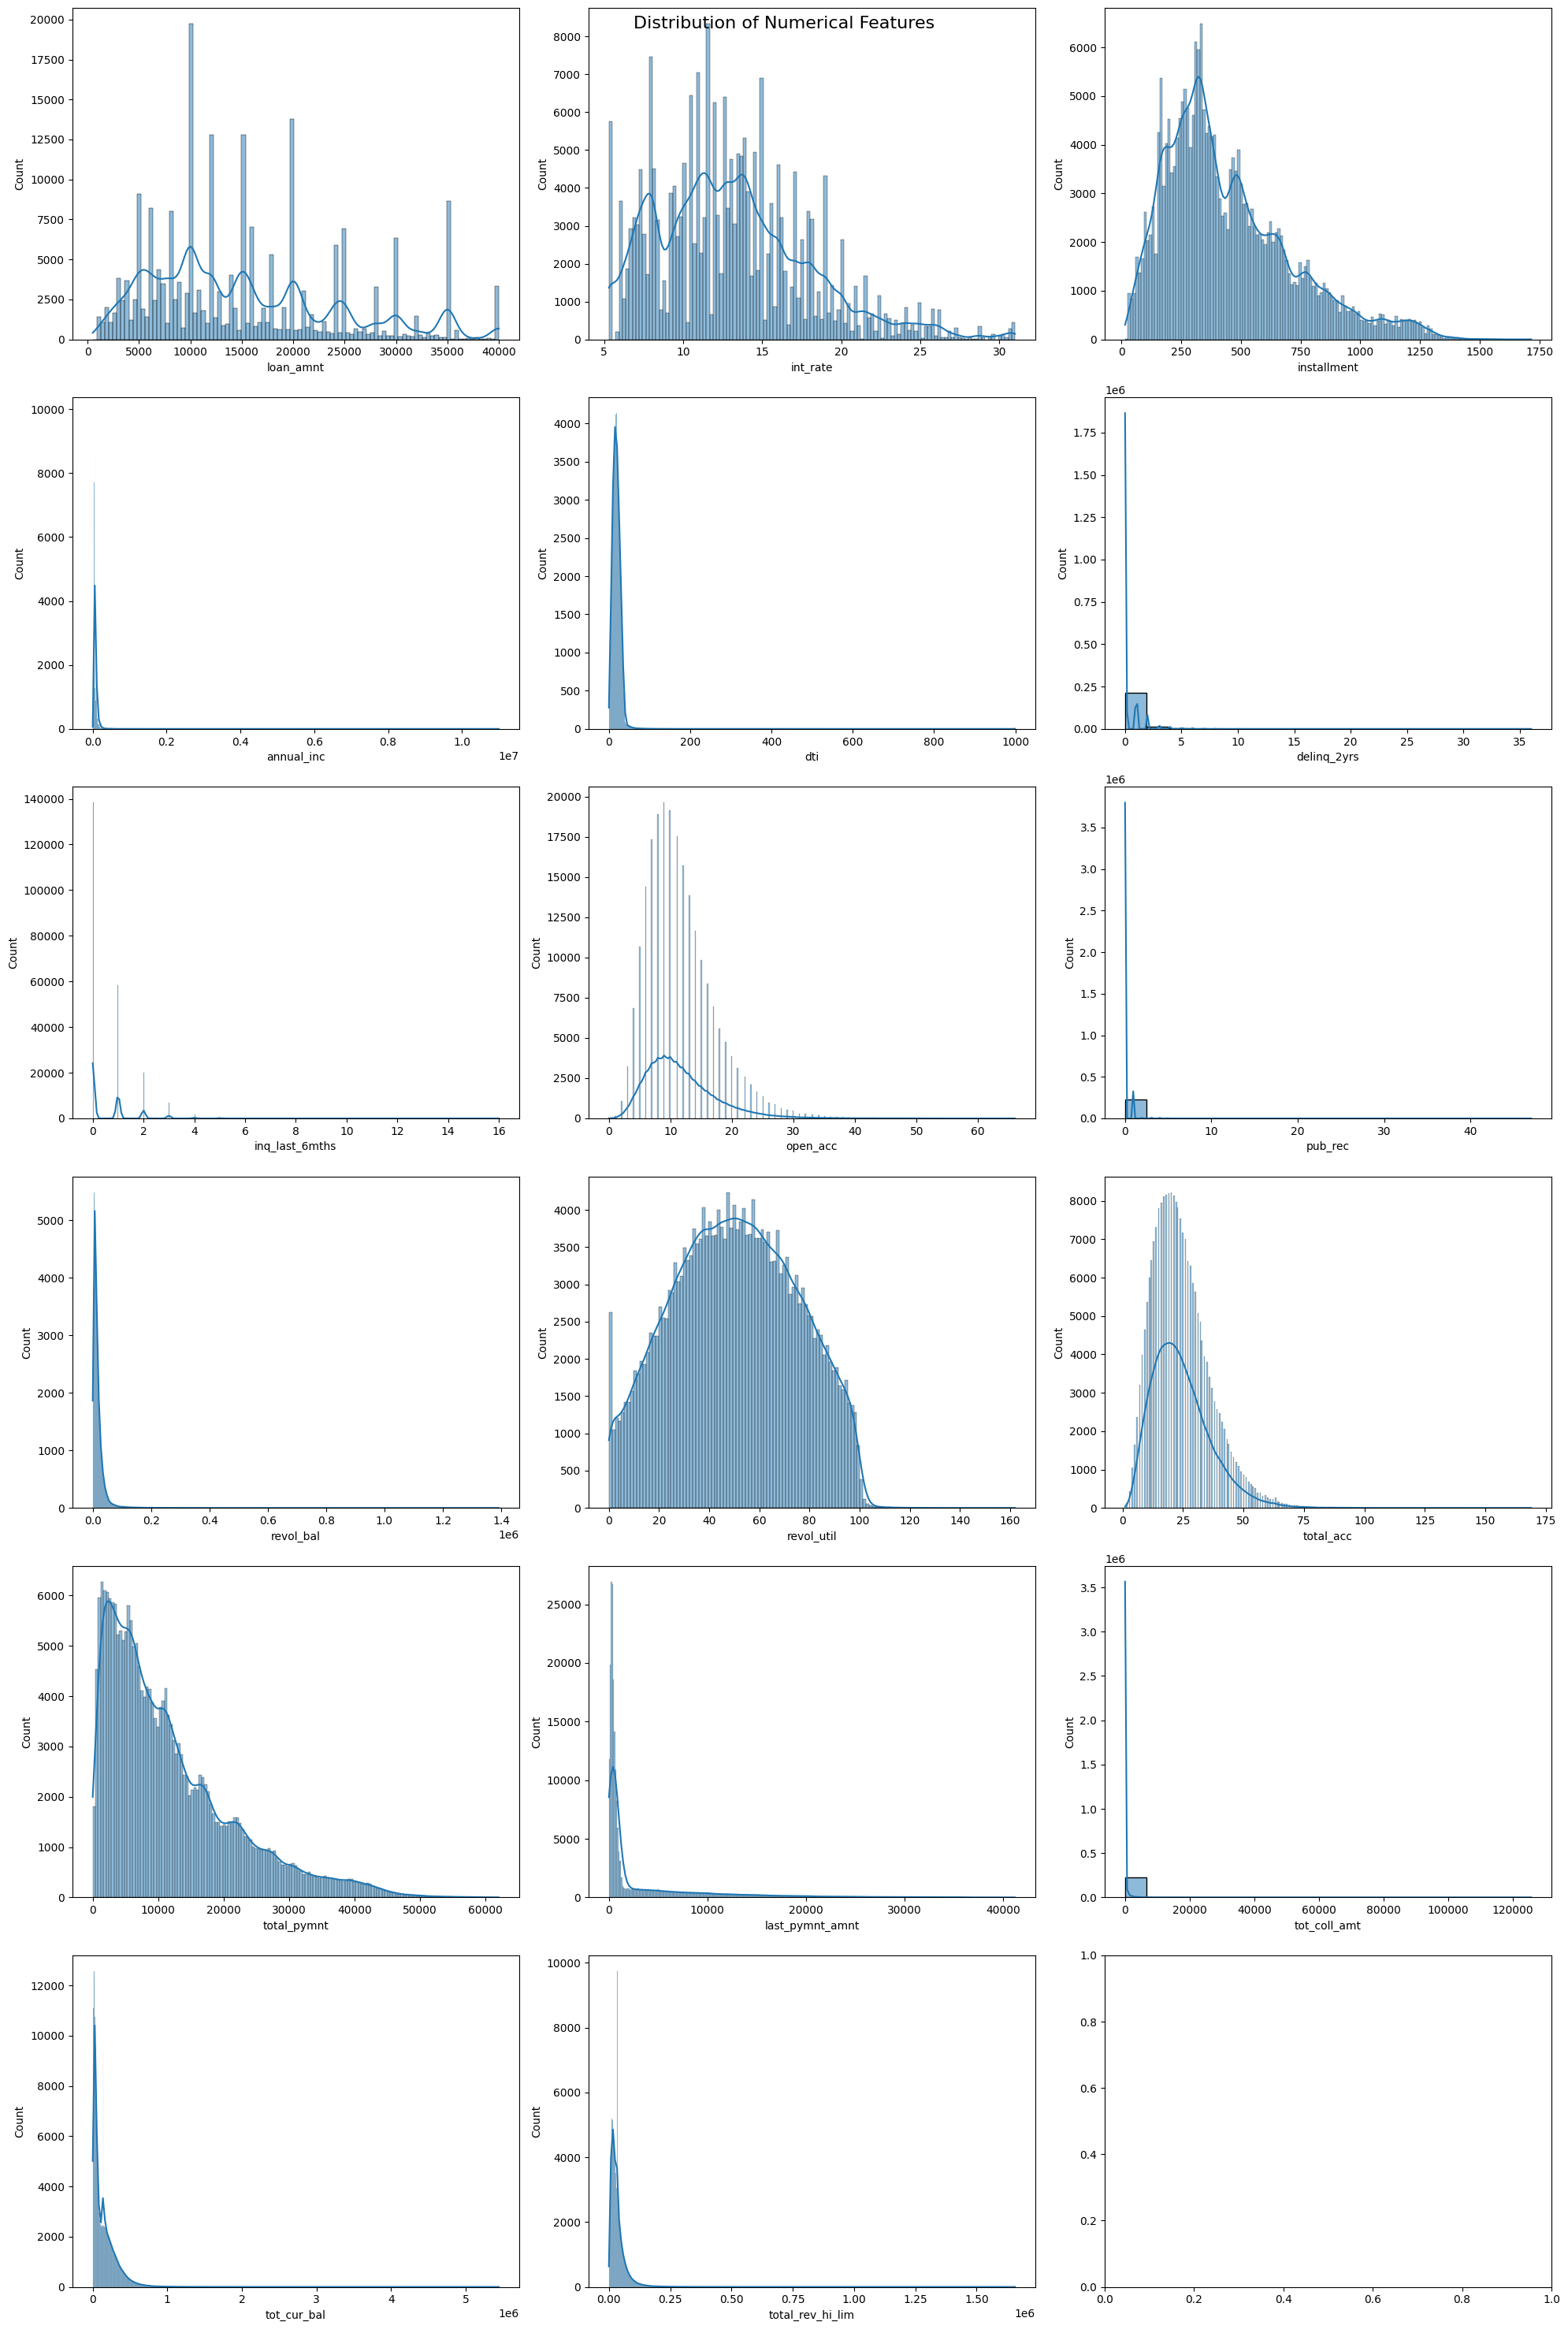

In [26]:
# Exploring the key numerical features
numerical_features = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
                      'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
                      'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
                      'last_pymnt_amnt', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']

fig, axes = plt.subplots(6, 3, figsize=(20, 30))
fig.suptitle('Distribution of Numerical Features', fontsize=16)
for i, feature in enumerate(numerical_features):
    sns.histplot(data=train_data, x=feature, ax=axes[i//3, i%3], kde=True)
plt.tight_layout()
plt.show()

<ipython-input-27-897a1a4f755b>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i//2, i%2].set_xticklabels(axes[i//2, i%2].get_xticklabels(), rotation=45)
<ipython-input-27-897a1a4f755b>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i//2, i%2].set_xticklabels(axes[i//2, i%2].get_xticklabels(), rotation=45)
<ipython-input-27-897a1a4f755b>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i//2, i%2].set_xticklabels(axes[i//2, i%2].get_xticklabels(), rotation=45)
<ipython-input-27-897a1a4f755b>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i//2, i%2].set_xticklabels(axes[i//2, i%2].get_xticklabels(), rotation=45)


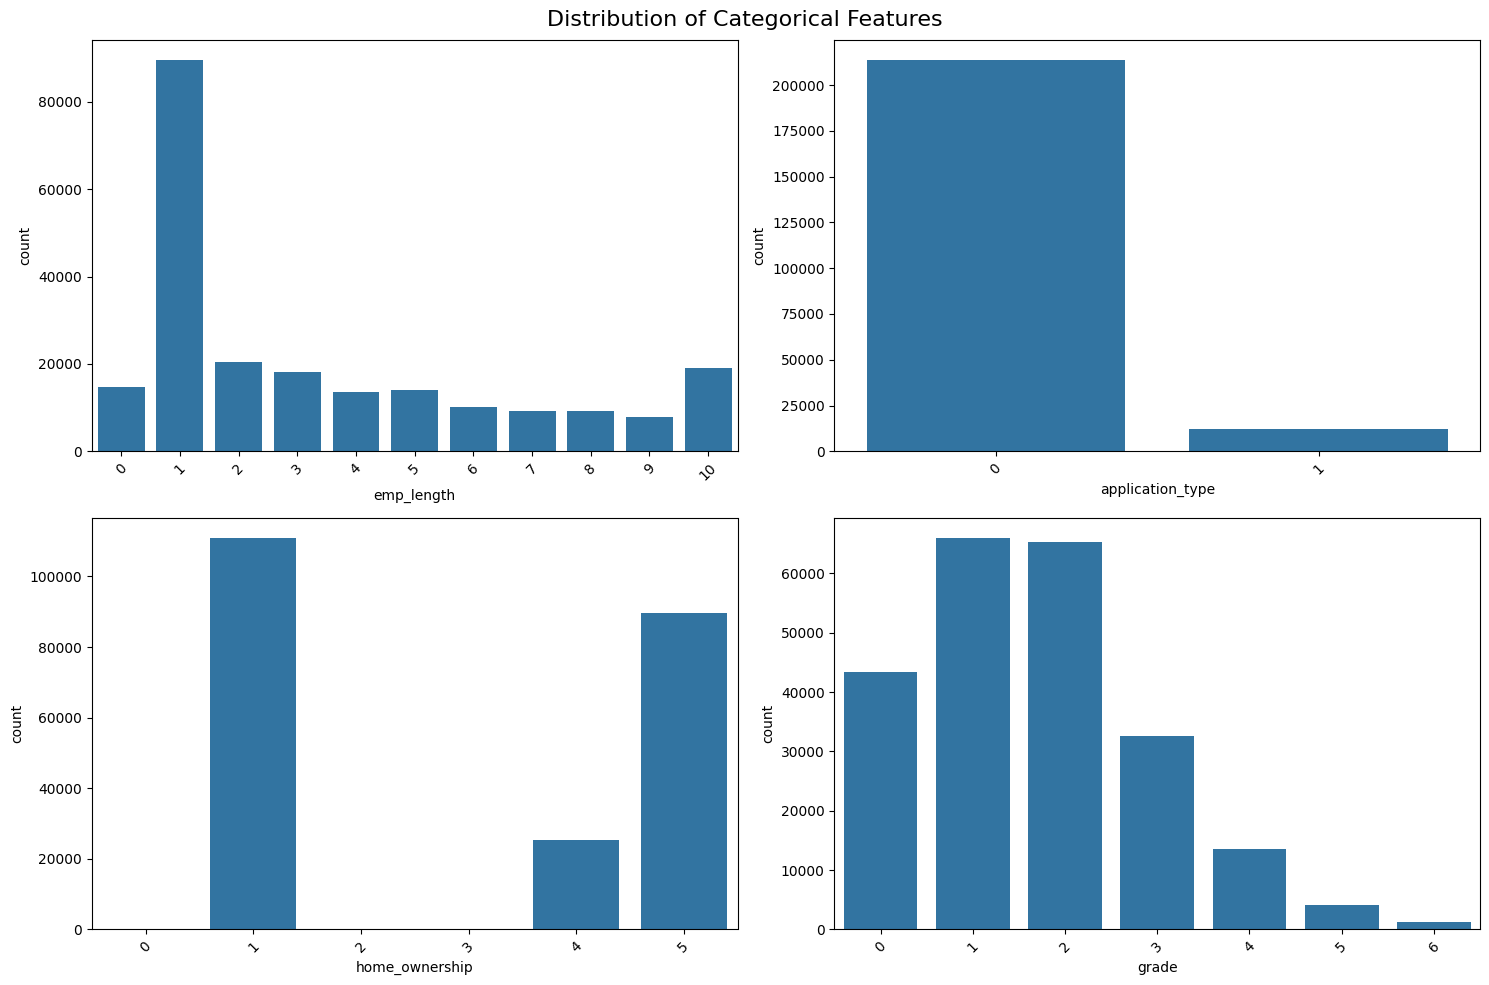

In [27]:
# Exploring the key categorical features
categorical_features = ['emp_length','application_type','home_ownership','grade']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of Categorical Features', fontsize=16)
for i, feature in enumerate(categorical_features):
    sns.countplot(data=train_data, x=feature, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_xticklabels(axes[i//2, i%2].get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()


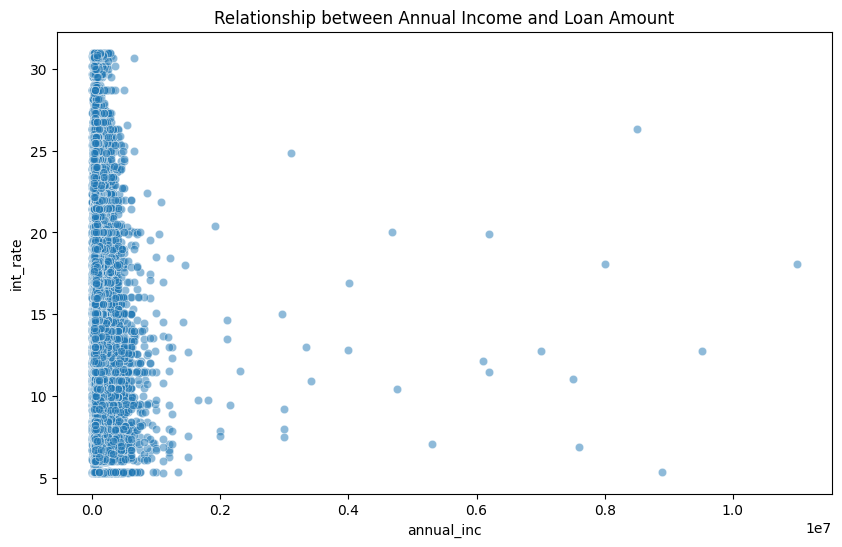

In [28]:
# Relationship between 'loan_amnt' and 'annual_inc'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='annual_inc', y='int_rate', data=train_data, alpha=0.5)
plt.title('Relationship between Annual Income and Loan Amount')
plt.show()


In [29]:
# Combine train and test datasets for correlation analysis
combined_dataset = pd.concat([train_data, test_data], axis=0)
correlation_matrix = combined_dataset.corr()

# Evaluating correlation of features with target variable 'y'
correlation_with_target = correlation_matrix['y'].drop('y')

# Getting top 10 features with the highest correlation with target
top_10_correlated_features = correlation_with_target.nlargest(10)

# Getting 10 features with the lowest correlation with target
bottom_10_correlated_features = correlation_with_target.nsmallest(10)




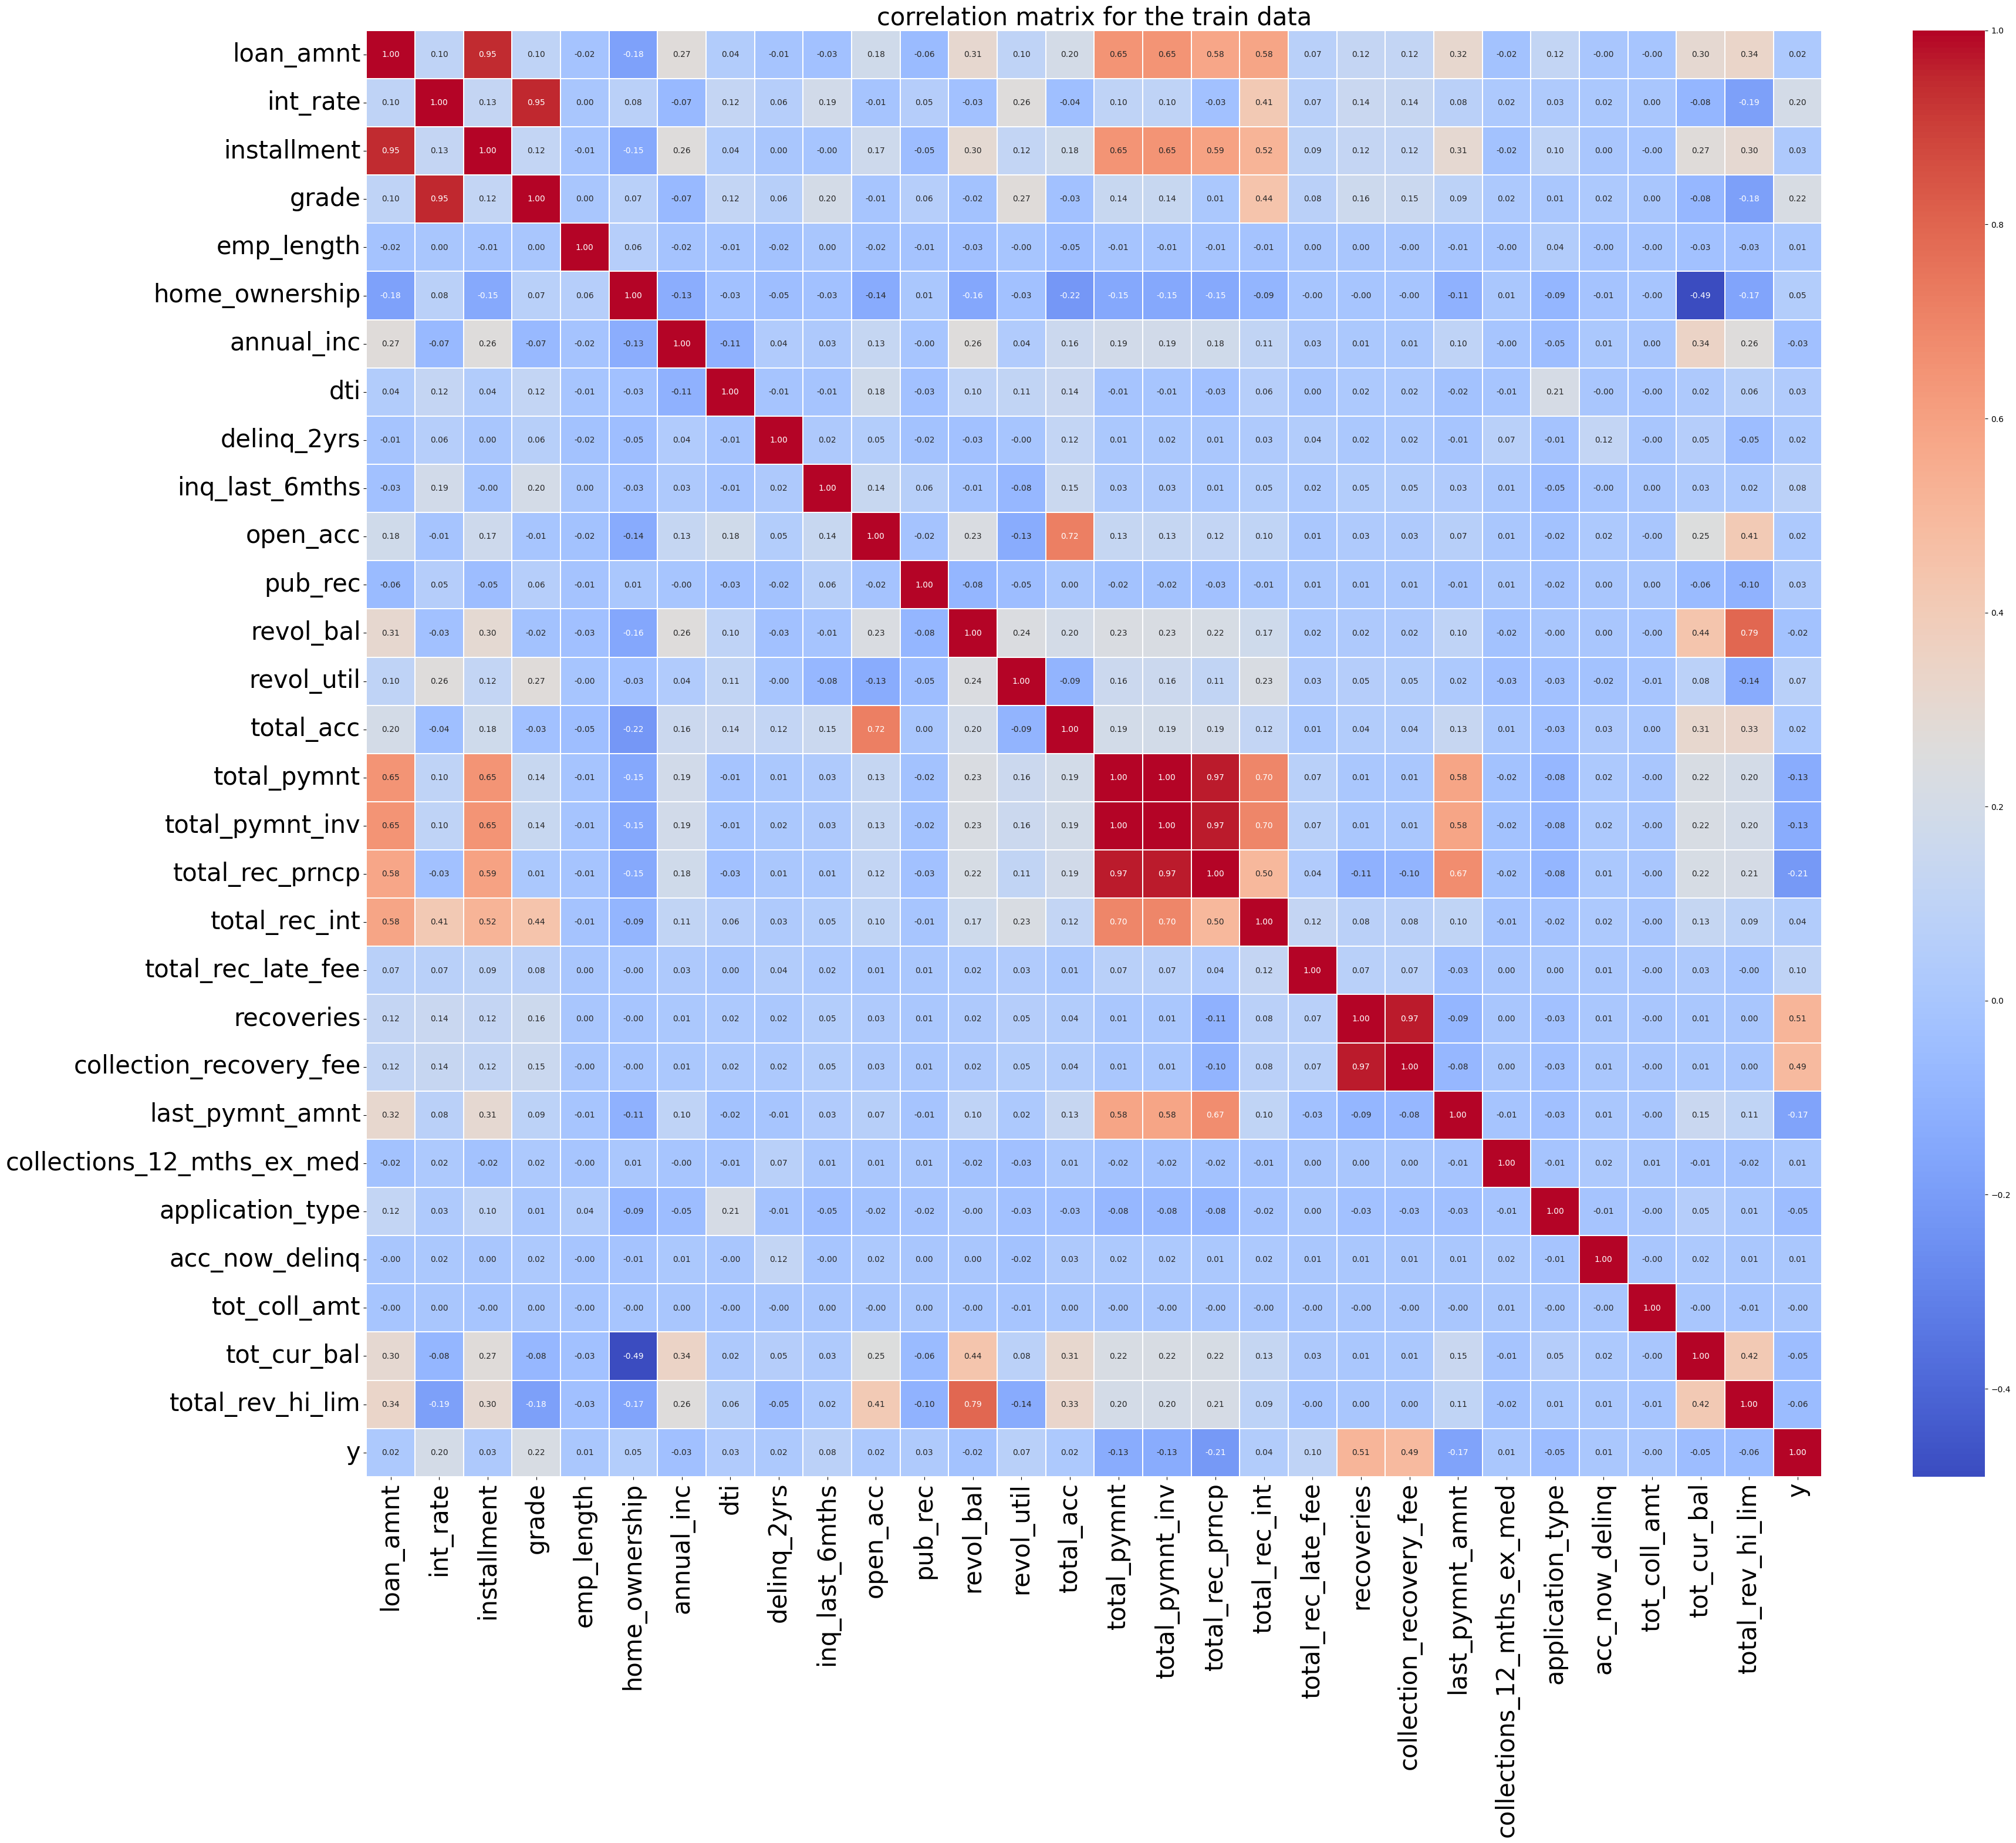

In [30]:
# Plotting correlation matrix
plt.figure(figsize=(40,32))

heatmap_correlation = sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt =".2f", linewidths = 0.01)
heatmap_correlation.set_xticklabels(heatmap_correlation.get_xticklabels(), fontsize=30)

heatmap_correlation.set_yticklabels(heatmap_correlation.get_yticklabels(), fontsize=30)

plt.title('correlation matrix for the train data', fontsize = 30)
plt.show()


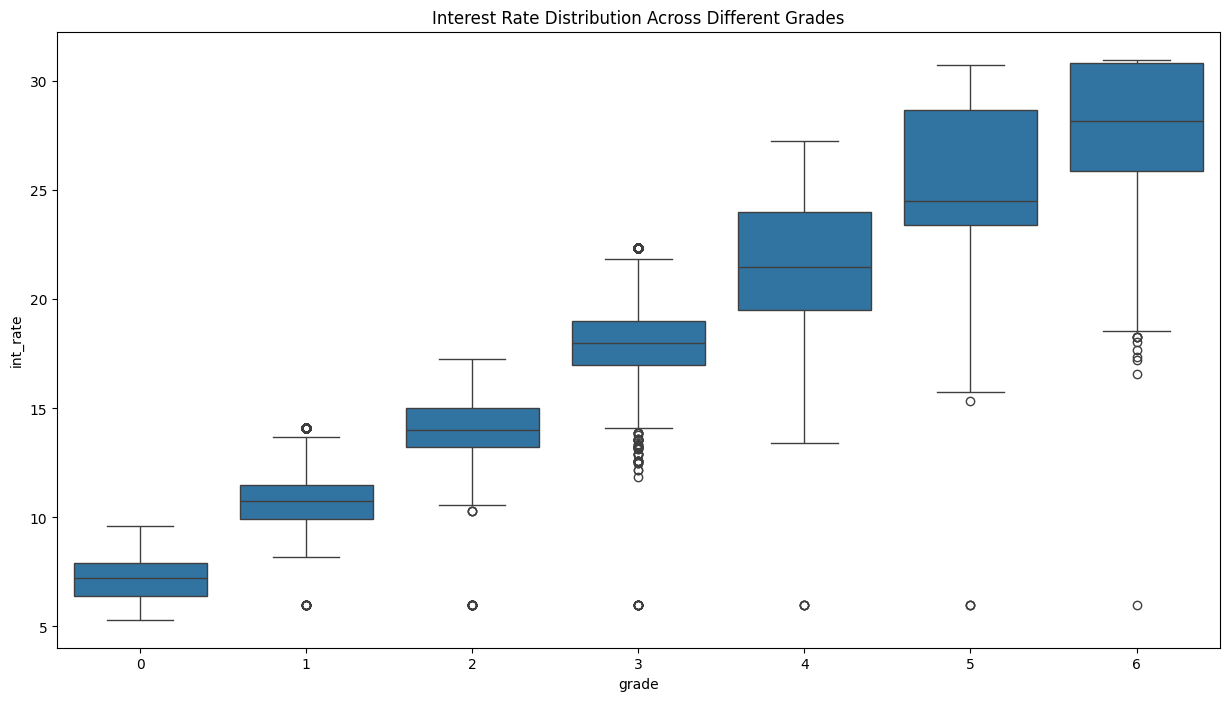

In [31]:
# Box plot for numerical features across different levels of categorical variables
plt.figure(figsize=(15, 8))
sns.boxplot(x='grade', y='int_rate', data=train_data)
plt.title('Interest Rate Distribution Across Different Grades')
plt.show()

In [32]:
print("the top 10 highly correlated values are :", top_10_correlated_features)


the top 10 highly correlated values are : recoveries                 0.514396
collection_recovery_fee    0.490135
grade                      0.220607
int_rate                   0.196532
total_rec_late_fee         0.099707
inq_last_6mths             0.084136
revol_util                 0.068672
home_ownership             0.049338
total_rec_int              0.040108
dti                        0.033825
Name: y, dtype: float64


In [33]:
print("The 10 least correlated values are :",bottom_10_correlated_features  )


The 10 least correlated values are : total_rec_prncp    -0.214704
last_pymnt_amnt    -0.174928
total_pymnt        -0.130961
total_pymnt_inv    -0.130823
total_rev_hi_lim   -0.057475
tot_cur_bal        -0.052145
application_type   -0.051029
annual_inc         -0.034606
revol_bal          -0.019608
tot_coll_amt       -0.000018
Name: y, dtype: float64


Splitting the data into feature and predictors

In [34]:
# Spliting the training dataset into predictors (X_train) and the target variable (Y_train).
X_train = train_data.drop('y', axis=1)
Y_train = train_data['y']

# Likewise, dividing the testing dataset into predictors (X_test) and the target variable (Y_test).
X_test = test_data.drop('y', axis=1)
Y_test = test_data['y']


**1.1 LINEAR REGRESSION MODEL**

In [35]:
# Initialize and train the Linear Regression model
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, Y_train)

# Predict the target variable for the training and testing datasets
Y_train_pred = linear_regression_model.predict(X_train)
Y_test_pred = linear_regression_model.predict(X_test)

# Output the Mean Squared Error for training and testing predictions
print("Mean Squared Error for Linear Regression on Training Data:")
print(mean_squared_error(Y_train, Y_train_pred), "\n")

print("Mean Squared Error for Linear Regression on Testing Data:")
print(mean_squared_error(Y_test, Y_test_pred))


Mean Squared Error for Linear Regression on Training Data:
0.06861237460629079 

Mean Squared Error for Linear Regression on Testing Data:
0.06795318322653007


**1.2 RIDGE REGRESSION MODEL**

In [36]:
from tqdm import tqdm

In [37]:
alpha_values = np.arange(0.01, 100, 0.1)

# Iterate over the range of alpha values to train and evaluate Ridge regression models
for alpha in tqdm(alpha_values):
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, Y_train)

    # Make predictions on the training and testing datasets
    Y_train_pred = ridge_model.predict(X_train)
    Y_test_pred = ridge_model.predict(X_test)

  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.95677e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
  0%|          | 1/1000 [00:00<02:57,  5.62it/s]/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.21671e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
  0%|          | 2/1000 [00:00<02:47,  5.96it/s]/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.51453e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
  0%|          | 3/1000 [00:00<02:57,  5.63it/s]/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.79357e-17

In [38]:

print("The Ridge Regression Mean Square Error of TrainData is :")
print(mean_squared_error(Y_train , Y_train_pred),"\n")

print("The Ridge Regression Mean Square Error of TestData is :")
print(mean_squared_error(Y_test , Y_test_pred))

The Ridge Regression Mean Square Error of TrainData is :
0.06861264923821468 

The Ridge Regression Mean Square Error of TestData is :
0.06795391143326913


**1.3 LASSO REGRESSION MODEL**

In [39]:

import numpy as np
import pandas as pd
from sklearn.linear_model import LassoCV, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



# Create a range of lambda values
lambdas = np.arange(0.01, 3, 0.01)

# Use LassoCV to find the best lambda (alpha)
lasso_cv = LassoCV(alphas=lambdas, cv=5, random_state=42)
lasso_cv.fit(X_train, Y_train)

# Get the best lambda (alpha)
best_lambda = lasso_cv.alpha_
print(f"Best lambda (alpha): {best_lambda:.4f}")


# Fit a new Lasso model with the best lambda
best_lasso = Lasso(alpha=best_lambda, random_state=42)
best_lasso.fit(X_train, Y_train)

# Make predictions on training and test data
y_train_pred = best_lasso.predict(X_train)
y_test_pred = best_lasso.predict(X_test)

# Calculate MSE for training and test data
train_mse = mean_squared_error(Y_train, y_train_pred)
test_mse = mean_squared_error(Y_test, y_test_pred)

print(f"(1) Mean Squared Error for the best model on training data: {train_mse:.4f}")
print(f"(2) Mean Squared Error for the best model on test data: {test_mse:.4f}")



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48.72475153702908, tolerance: 1.8503173273322893
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48.74507265223292, tolerance: 1.8503173273322893
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48.767120259490184, tolerance: 1.8503173273322893
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: Convergenc

Best lambda (alpha): 0.0100
(1) Mean Squared Error for the best model on training data: 0.0696
(2) Mean Squared Error for the best model on test data: 0.0691


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.293e+03, tolerance: 2.317e+00
  model = cd_fast.enet_coordinate_descent(


**1.4 RANDOM FOREST MODEL**

In [40]:
## Set up the RF-Regressor with 100 estimators, a maximum depth of 10, and a fixed random state for consistency
random_forest_reg = RandomForestRegressor(n_estimators=100, max_depth = 10,random_state=42)
random_forest_reg.fit(X_train,Y_train)

# Making Predictions
ytrain_predict = random_forest_reg.predict(X_train)
ytest_predict = random_forest_reg.predict(X_test)

MSE_train = mean_squared_error(Y_train,ytrain_predict)
MSE_test = mean_squared_error(Y_train,ytest_predict)

In [41]:
print(f"The Random Forest Mean Square Error of TrainData is :{MSE_train:.4f}")

print(f"The Random Forest  Mean Square Error of TestData is :{MSE_test:.4f}")

The Random Forest Mean Square Error of TrainData is :0.0273
The Random Forest  Mean Square Error of TestData is :0.1762


# **1.5 NEURAL NETWORK MODEL**

In [42]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Creating the sequential model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compiling the model with LR rate LOSS and Metrics.
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training the model with 50 Epoch.
history = model.fit(X_train, Y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

# Evaluating the model
train_loss, train_accuracy = model.evaluate(X_train, Y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=0)

print(f"(1) Training Accuracy: {train_accuracy:.4f}")
print(f"    Training Loss (Binary Cross-Entropy): {train_loss:.4f}")
print(f"(2) Testing Accuracy: {test_accuracy:.4f}")
print(f"    Testing Loss (Binary Cross-Entropy): {test_loss:.4f}")

# Getting predictions
y_train_pred = (model.predict(X_train) > 0.5).astype("int32")
y_test_pred = (model.predict(X_test) > 0.5).astype("int32")

print("\nClassification Report (Test Data):")
print(classification_report(Y_test, y_test_pred))




Epoch 1/50
5652/5652 [==============================] - 15s 2ms/step - loss: 62.6081 - accuracy: 0.9018 - val_loss: 16.2402 - val_accuracy: 0.9477
Epoch 2/50
5652/5652 [==============================] - 14s 2ms/step - loss: 16.0588 - accuracy: 0.9183 - val_loss: 7.2890 - val_accuracy: 0.6884
Epoch 3/50
5652/5652 [==============================] - 14s 2ms/step - loss: 3.0431 - accuracy: 0.9168 - val_loss: 0.2480 - val_accuracy: 0.9231
Epoch 4/50
5652/5652 [==============================] - 16s 3ms/step - loss: 0.2578 - accuracy: 0.9303 - val_loss: 0.3168 - val_accuracy: 0.8932
Epoch 5/50
5652/5652 [==============================] - 15s 3ms/step - loss: 0.2712 - accuracy: 0.9200 - val_loss: 0.1941 - val_accuracy: 0.9524
Epoch 6/50
5652/5652 [==============================] - 15s 3ms/step - loss: 0.2258 - accuracy: 0.9384 - val_loss: 0.2156 - val_accuracy: 0.9458
Epoch 7/50
5652/5652 [==============================] - 15s 3ms/step - loss: 0.2096 - accuracy: 0.9455 - val_loss: 0.2157 - val

The Reason For Model Selection:


The Keras Sequential model was chosen for binary classification for the following reasons:

Suitability for Binary Classification: It is specifically designed for binary classification problems.

Appropriate Loss Function: It uses binary cross-entropy loss, which is ideal for binary classification tasks.

Interpretable Metric: The model directly outputs accuracy as a metric, which is straightforward and easily interpretable.

Balanced Architecture: The architecture (64 -> 32 -> 1) strikes a good balance between model complexity and computational efficiency.

Sigmoid Activation: The final layer employs a sigmoid activation function, which outputs probabilities between 0 and 1.

Flexibility: Keras offers significant flexibility in model design, making it suitable for both small and large datasets.

Ease of Modification: The framework allows for easy modification and experimentation with different architectures and hyperparameters


**1.6 EVALUATION**

In [43]:
# Calculating the MSE for each model on the training and test datasets
train_mse_values = [mean_squared_error(Y_train, model.predict(X_train)) for model in [linear_regression_model, ridge_model, best_lasso, random_forest_reg, model]]
test_mse_values = [mean_squared_error(Y_test, model.predict(X_test)) for model in [linear_regression_model, ridge_model, best_lasso, random_forest_reg, model]]
model_names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Random Forest', 'Neural Network']

# Creating a DataFrame to display the MSE values
mse_dataframe = pd.DataFrame({'Model': model_names, 'MSE Train': train_mse_values, 'MSE Test': test_mse_values})
print(mse_dataframe)

# Identifing the model with the lowest test MSE
best_model_index = np.argmin(test_mse_values)
print('Best Model for Predicting Loan Default:', model_names[best_model_index])

7065/7065 [==============================] - 10s 1ms/step
               Model  MSE Train  MSE Test
0  Linear Regression   0.068612  0.067953
1   Ridge Regression   0.068613  0.067954
2   Lasso Regression   0.069637  0.069058
3      Random Forest   0.027278  0.027660
4     Neural Network   0.042182  0.041252
Best Model for Predicting Loan Default: Random Forest
